In [1]:
!apt-get -qq install libgdal-dev libproj-dev >> /dev/null && echo "Apt Install Success"
!pip install --no-binary shapely shapely --force >> /dev/null && echo "Shapely Install Success"
!pip install cartopy==0.19.0.post1 netCDF4 geopandas metpy >> /dev/null && echo "Cartopy/NetCDF Install Success"

Apt Install Success
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
Shapely Install Success
Cartopy/NetCDF Install Success


# Cartopy
* Getting started [tutorial](https://scitools.org.uk/cartopy/docs/latest/#getting-started).
* [Examples Gallery](https://scitools.org.uk/cartopy/docs/latest/gallery/index.html)
* Adds map plotting utilities on top of Matplotlib's base functionality.
  * Provides a wide variety of map [projections](https://scitools.org.uk/cartopy/docs/latest/crs/projections.html) as well as the ability to create your own.
  * Adds various plotting utilities like the ability to plot land/political boundaries.

# Basic Map Plot

In [2]:
import metpy
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

fig = plt.figure()

# Create the projection we'll be using.
plot_projection = ccrs.PlateCarree()

# Provide the projection we want our axes to be in.
ax = plt.axes(projection=plot_projection)

# Draw coastlines as an outline.
ax.coastlines(color="red")

# Draw a stock background image.
ax.stock_img()

# Tell the axes that we want to see the entire earth.
ax.set_global()
plt.show()

/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


# Plotting Geographic Features On a Map
* We almost always need to plot coastlines, politcal boundaries, bodies of water, etc. on our maps in addition to our data.
* Cartopy has a few convenience routines like `coastlines` that allow you to plot common geographic features without specifying a lot of information.
* In general though, you need to call `add_feature` on your `axes` object and pass it a `Feature` object to draw. 
* The `cartopy.feature` module has a number of pre-defined features.
* You can also create your own `Feature` objects that use datasets from web sources: 
  * [https://www.naturalearthdata.com/](https://www.naturalearthdata.com/) 
  * [NOAA GSHHS](https://www.ngdc.noaa.gov/mgg/shorelines/gshhs.html) 
  * We won't cover this today, but there is an example [here](https://scitools.org.uk/cartopy/docs/latest/gallery/lines_and_polygons/feature_creation.html#sphx-glr-gallery-lines-and-polygons-feature-creation-py).

/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/physical/ne_110m_ocean.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/physical/ne_110m_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/physical/ne_110m_lakes.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


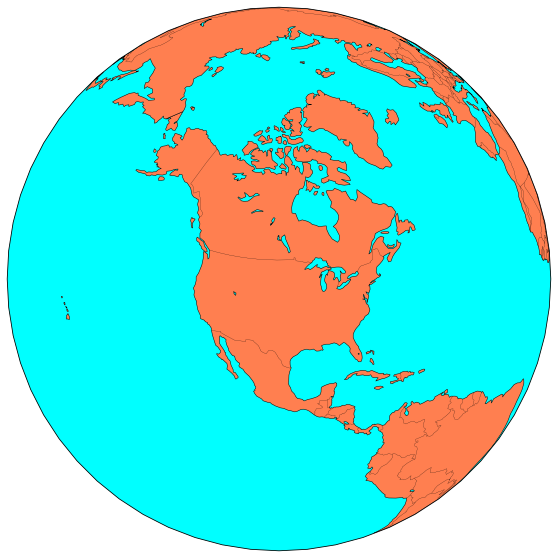

In [3]:
from cartopy import feature as cfeature

fig = plt.figure(figsize=(10, 10), facecolor='w')
# set up initial orthographic viewpoint and set center location 
ax = plt.axes(
    projection=ccrs.Orthographic(central_longitude=-100, central_latitude=45))

ax.add_feature(cfeature.OCEAN, zorder=0, color='aqua')
ax.add_feature(
    cfeature.LAND, zorder=0, facecolor='coral', lw=0.5, edgecolor='black')
ax.add_feature(
    cfeature.BORDERS, zorder=0, facecolor='None', lw=0.2, edgecolor='black')
ax.add_feature(
    cfeature.LAKES, zorder=0, facecolor='aqua', lw=0.5,  edgecolor='black')

ax.set_global()

plt.show()

# Plotting Vector Graphics On a Map
* Vector graphics consist of screen/image resolution independent geometric shapes.
* Can make line, scatter, contour, mesh, arrow, and wind-barb plots.
* There is basically a single difference between doing this on a map and making a normal Matplotlib plot.
  * You need to tell Cartopy what projection your data is in when you call the appropriate plotting routine on your axes object.
  * Your vector data is probably going to use the PlateCarree projection which allows you to use lat/lon coordinates.
  * If your `axes` is already using the PlateCarree projection, then you can skip this.



In [4]:
import numpy as np

def create_sample_data():
    nlats = 73; nlons = 145; delta = 2.*np.pi/(nlons-1)
    lats = (0.5*np.pi-delta*np.indices((nlats,nlons))[0,:,:])
    lons = (delta*np.indices((nlats,nlons))[1,:,:])
    wave = 0.75*(np.sin(2.*lats)**8*np.cos(4.*lons))
    mean = 0.5*np.cos(2.*lats)*((np.sin(2.*lats))**2 + 2.)
    return np.degrees(lats), np.degrees(lons), wave+mean

fig = plt.figure(figsize=(10, 10), facecolor='w')
# set up initial orthographic viewpoint and set center location 
ax = plt.axes(
    projection=ccrs.Orthographic(central_longitude=-100, central_latitude=45))

ax.add_feature(cfeature.OCEAN, zorder=0, color='aqua')
ax.add_feature(
    cfeature.LAND, zorder=0, facecolor='coral', lw=0.5, edgecolor='black')
ax.add_feature(
    cfeature.BORDERS, zorder=0, facecolor='None', lw=0.2, edgecolor='black')
ax.add_feature(
    cfeature.LAKES, zorder=0, facecolor='aqua', lw=0.5,  edgecolor='black')

lat, lon, data = create_sample_data()
cs = ax.contour(
    lon, lat, data, 15, linewidths=1.5, transform=ccrs.PlateCarree(), zorder=1)

# Show the entire Earth.
ax.set_global()

plt.show()


## Setting the Extents of a Plot

/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_ocean.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_lakes.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


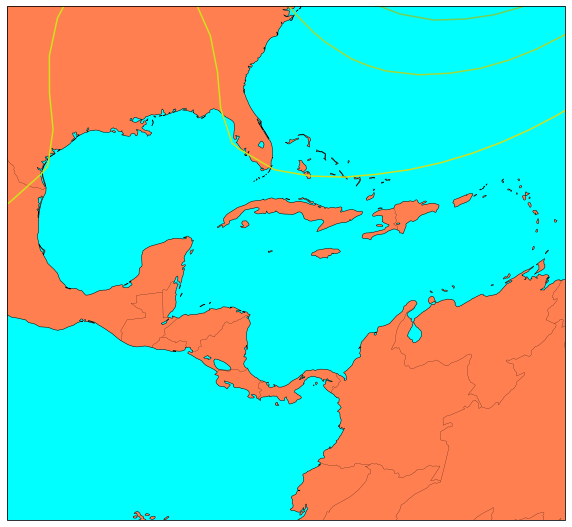

In [5]:
fig = plt.figure(figsize=(10, 10), facecolor='w')
ax = plt.axes(
    projection=ccrs.Orthographic(central_longitude=-100, central_latitude=45))

ax.add_feature(cfeature.OCEAN, zorder=0, color='aqua')
ax.add_feature(
    cfeature.LAND, zorder=0, facecolor='coral', lw=0.5, edgecolor='black')
ax.add_feature(
    cfeature.BORDERS, zorder=0, facecolor='None', lw=0.2, edgecolor='black')
ax.add_feature(
    cfeature.LAKES, zorder=0, facecolor='aqua', lw=0.5,  edgecolor='black')

lat, lon, data = create_sample_data()
cs = ax.contour(
    lon, lat, data, 15, linewidths=1.5, transform=ccrs.PlateCarree(), zorder=1)

# Need to pass a list of the left bound, right bound, bottom bound, top bound
# in projection coordinates as well as the projection you're using to specify
# the bounds.
ax.set_extent([-100, -60, 0, 30], crs=ccrs.PlateCarree())

plt.show()

## Plotting Wind Barbs

In [6]:
def create_barb_data():
  lons = np.arange(-180, 181, 10)
  lats = np.arange(-90, 91, 10)
  x, y = np.meshgrid(lons, lats)
  u = (x + 180) / 360 * 100
  v = (y + 90) / 180 * 100
  return x, y, u, v

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

ax.stock_img()
ax.coastlines()

x, y, u, v = create_barb_data()
# We pass the length of each barb, a dictionary of how to draw the different
# parts of the barb, and a dictionary of what increments in your vector magnitude
# should correspond to different barb symbols.
ax.barbs(x, y, u, v, length=5,
          sizes=dict(emptybarb=0, spacing=0.2, height=0.5),
          barb_increments=dict(half=5, full=10, flag=50),
          linewidth=0.95, transform=ccrs.PlateCarree())

ax.set_global()

plt.show()

### Plotting Data With pcolormesh
* `pcolormesh` uses the lat/lon coordinates of your data to create a mesh of `quads` that are filled with a solid color.
pcolormesh.png
* Easy to work with since you can basically ignore the projection your data is in and just specify lats/lons for each point.
* Does not require equally spaced data.
* May need to offset the coordinate values since the data values no longer correspond to the values at each coordinate but are "between" your coordinates.
  * Setting `shading="gouraud"` will assume that your data values are located at each coordinate point and the color will be interpolated across the surface of the quad.
* Has extra memory/CPU overhead.

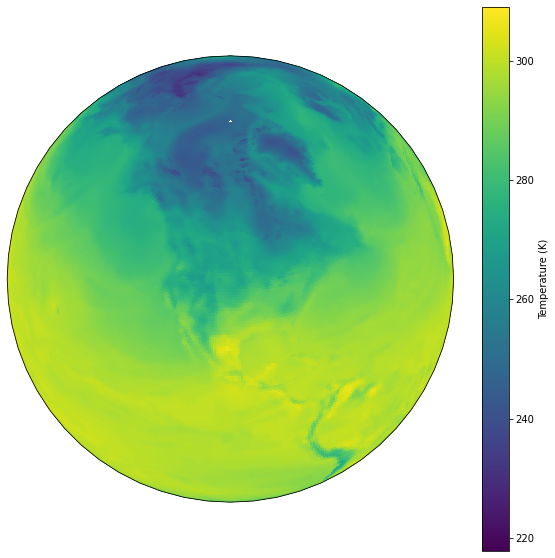

In [7]:
import xarray as xr
dataset = xr.open_dataset(
    'http://thredds.atmos.albany.edu:8080/thredds/dodsC/ERA-Interim/2018/tsfc.2018.nc').sel(time='2018-03-01T00:00:00').load()

fig = plt.figure(figsize=(10, 10), facecolor='w')
ax = plt.axes(
    projection=ccrs.Orthographic(central_longitude=-100, central_latitude=45))
data = dataset["tsfc"]
# Plot a mesh of quads
p1 = ax.pcolormesh(data.lon, data.lat, data, transform=ccrs.PlateCarree())
fig.colorbar(p1, label="Temperature (K)")

plt.show()

# Adding Gridlines
* Need to create `matplotlib.ticker` objects for your lats/lons to tell Cartopy where to draw your labelled gridlines.
* Need to call `gridlines` on your `axes` objects and pass your `ticker` objects.

In [8]:
from cartopy.mpl import gridliner
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs

projections ={
    'stereographic':cartopy.crs.Stereographic(central_latitude=5, central_longitude=-180), 
    'PlateCarree':cartopy.crs.PlateCarree(),
    'AlbersEqualArea':cartopy.crs.AlbersEqualArea(),
    'AzimuthalEquidistant':cartopy.crs.AzimuthalEquidistant(),
    'Orthographic':cartopy.crs.Orthographic(),
    'InterruptedGoodeHomolosine':cartopy.crs.InterruptedGoodeHomolosine(),
    'Satellite':cartopy.crs.Geostationary(),
    'Gnomic':cartopy.crs.Gnomonic()
}
lon_delta = 30
lat_delta = 30
xlocator = mticker.FixedLocator(np.arange(-180, 180 + 1, lon_delta))
ylocator = mticker.FixedLocator(np.arange(-90, 91, lat_delta))

fig = plt.figure(figsize=(15,15))
nrows=(len(projections.keys())+1)//2
ncols=2

axes = []
for i, (name, proj) in enumerate(projections.items(), 1):
    ax = fig.add_subplot(nrows, ncols, i, projection=proj)
    ax.coastlines()
    ax.gridlines(xlocs=xlocator, ylocs=ylocator,draw_labels=True, linewidth=1, color='gray', alpha=1, linestyle='--')
    ax.set_title(name)
    axes.append(ax)

plt.show()

# Plotting Raster Data On A Map
* `pcolormesh` might have too much overhead for your data. (This frequently happens with GOES 16/17 fulldisk data). 
* When this happens you can "paste" your pixels to the screen/image.
  * Raster graphics are stored as an array of color values.
  * Graphics system figures out where your color array elements land in the final screen/image array.
  * Pixels probably won't line up perfectly, so they'll be resampled when the final image is produced.
* Need data regularly spaced in its projection.
  * Polar orbitting data needs to be regridded to a regularly spaced grid first.
* Need to construct the projection from meta-data in the file as well as the extents of your array in projection space.
  * This is a pain, but if your data is in a CF compliant netCDF file and provides projection information, [Metpy](https://unidata.github.io/MetPy/latest/index.html) will provide a Cartopy CRS and the extent information for you.


In [9]:
ds = xr.open_dataset("https://thredds-test.unidata.ucar.edu/thredds/dodsC/satellite/goes16/GOES16/ABI/CONUS/Channel13/20210804/OR_ABI-L1b-RadC-M6C13_G16_s20212162321194_e20212162323578_c20212162324033.nc")
rad = ds.metpy.parse_cf('Rad')
dataproj = rad.metpy.cartopy_crs
# Grab coordinate data
x = rad.x
y = rad.y

fk1 = ds.planck_fk1
fk2 = ds.planck_fk2
bc1 = ds.planck_bc1
bc2 = ds.planck_bc2
# Calculate the brightness temperature from inverse Plank
T = fk2 / (np.log((fk1 / rad) + 1))
# Add scale and offest correction to obtain final BT for particular channel
ir_BT = bc2*T + bc1

fig = plt.figure(1, figsize=(20,10))
ax = plt.subplot(111, projection=dataproj)
ax.coastlines()
# Use imshow to display the image on the map.
# Notice that no transform keyword was provided. This is because the axes object
# is in the same projection as our data.
img = ax.imshow(
    ir_BT, extent=(x.min(), x.max(), y.min(), y.max()), origin='upper', 
    cmap=plt.cm.gray_r, resample="nearest")
plt.show()

/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
